In [29]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from scipy.stats import pearsonr
from scipy.stats import spearmanr
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [30]:
flights_tb = pd.read_csv('flights.csv', nrows=999999)

In [31]:
flights_tb.head(25)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5,2015,1,1,4,DL,806,N3730B,SFO,MSP,25,...,610.0,8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
6,2015,1,1,4,NK,612,N635NK,LAS,MSP,25,...,509.0,-17.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
7,2015,1,1,4,US,2013,N584UW,LAX,CLT,30,...,753.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
8,2015,1,1,4,AA,1112,N3LAAA,SFO,DFW,30,...,532.0,-13.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
9,2015,1,1,4,DL,1173,N826DN,LAS,ATL,30,...,656.0,-15.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
#--------------------1----------------------#

print("Отменённые рейсы =",flights_tb[flights_tb['CANCELLED']==1].shape[0])

#-------------------------------------------#

Отменённые рейсы = 40132


In [27]:
#--------------------2-----------------------#

temp = flights_tb.groupby('ORIGIN_AIRPORT')[['CANCELLED']].count()
port = temp.sort_values(by=['CANCELLED'], ascending=False).head(3)
print(port)

#--------------------------------------------#

                CANCELLED
ORIGIN_AIRPORT           
ATL                 63413
ORD                 50494
DFW                 48665


In [34]:
#--------------------3-----------------------#
pears_d = pearsonr(flights_tb['CANCELLED'],flights_tb['DAY_OF_WEEK'])
spearm_d = spearmanr(flights_tb['CANCELLED'],flights_tb['DAY_OF_WEEK'])

print("День недели")
print("Пирсон: ",pears_d)
print("Спирмен: ",spearm_d)
                          
if (spearm_d[1]<0.05):
    print("p-value is good")
else:
    print("p-value is not good")


День недели
Пирсон:  (-0.03462481314864562, 7.47848049493915e-263)
Спирмен:  SpearmanrResult(correlation=-0.03574618487537239, pvalue=5.04970054947827e-280)
p-value is good


In [35]:
pears_m = pearsonr(flights_tb['CANCELLED'],flights_tb['MONTH'])
spearm_m = spearmanr(flights_tb['CANCELLED'],flights_tb['MONTH'])

print("Месяц")
print("Пирсон: ",pears_m)
print("Спирмен: ",spearm_m)
      
if (spearm_d[1]<0.05):
    print("p-value is good")
else:
    print("p-value is not good")


Месяц
Пирсон:  (0.08088373415576963, 0.0)
Спирмен:  SpearmanrResult(correlation=0.07898789409294106, pvalue=0.0)
p-value is good


In [36]:
label_encoder = LabelEncoder()
air = pd.Series(label_encoder.fit_transform(flights_tb['AIRLINE']))

pears_a = pearsonr(flights_tb['CANCELLED'],air)
spearm_a = spearmanr(flights_tb['CANCELLED'],air)

print("Авиакомпания")
print("Пирсон: ",pears_a)
print("Спирмен: ",spearm_a)
      
if (spearm_d[1]<0.05):
    print("p-value is good")
else:
    print("p-value is not good")

Авиакомпания
Пирсон:  (-0.016440813665511707, 9.587194846529798e-61)
Спирмен:  SpearmanrResult(correlation=-0.016110673601673193, pvalue=2.1116938310421653e-58)
p-value is good


In [38]:
port = pd.Series(label_encoder.fit_transform(flights_tb['ORIGIN_AIRPORT']))

pears_p = pearsonr(flights_tb['CANCELLED'], port)
spearm_p = spearmanr(flights_tb['CANCELLED'], port)

print("Аэропорт")
print("Пирсон: ",pears_p)
print("Спирмен: ",spearm_p)
       
if (spearm_d[1]<0.05):
    print("p-value is good")
else:
    print("p-value is not good")

Аэропорт
Пирсон:  (-0.028754458960066676, 6.72265524217414e-182)
Спирмен:  SpearmanrResult(correlation=-0.027344831090472043, pvalue=1.0829465681278831e-164)
p-value is good


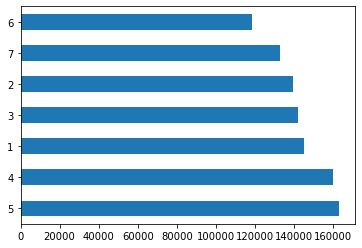

In [39]:
flights_tb['DAY_OF_WEEK'].value_counts().plot.barh()

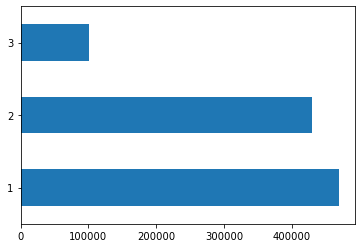

In [40]:
flights_tb['MONTH'].value_counts().plot.barh()

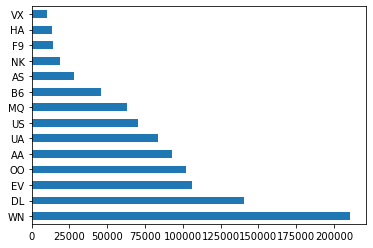

In [42]:
flights_tb['AIRLINE'].value_counts().plot.barh()

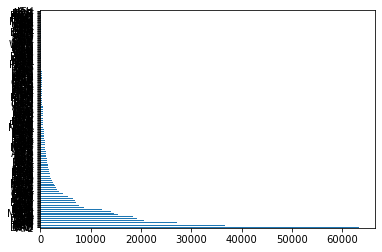

In [45]:
flights_tb['ORIGIN_AIRPORT'].value_counts().plot.barh()

#--------------------------------------------#

In [48]:
#--------------------4-----------------------#

print("Для AA")
print("Количество рейсов =", flights_tb[flights_tb['AIRLINE']=='AA']['FLIGHT_NUMBER'].count())
print("Отменённых рейсы =",flights_tb[(flights_tb['AIRLINE']=='AA') & (flights_tb['CANCELLED']==1)].shape[0])
print("Перенаправленные рейсы =",flights_tb[(flights_tb['AIRLINE']=='AA') & (flights_tb['DIVERTED']==1)].shape[0])
print("Для WN")
print("Количество рейсов =", flights_tb[flights_tb['AIRLINE']=='WN']['FLIGHT_NUMBER'].count())
print("Отменённых рейсы =",flights_tb[(flights_tb['AIRLINE']=='WN') & (flights_tb['CANCELLED']==1)].shape[0])
print("Перенаправленные рейсы =",flights_tb[(flights_tb['AIRLINE']=='WN') & (flights_tb['DIVERTED']==1)].shape[0])
print("Для VX")
print("Количество рейсов =", flights_tb[flights_tb['AIRLINE']=='VX']['FLIGHT_NUMBER'].count())
print("Отменённых рейсы =",flights_tb[(flights_tb['AIRLINE']=='VX') & (flights_tb['CANCELLED']==1)].shape[0])
print("Перенаправленные рейсы =",flights_tb[(flights_tb['AIRLINE']=='VX') & (flights_tb['DIVERTED']==1)].shape[0])

#--------------------------------------------#


Для AA
Количество рейсов = 93013
Отменённых рейсы = 4627
Перенаправленные рейсы = 226
Для WN
Количество рейсов = 210935
Отменённых рейсы = 6553
Перенаправленные рейсы = 486
Для VX
Количество рейсов = 9956
Отменённых рейсы = 274
Перенаправленные рейсы = 35


In [54]:
#---------------------5----------------------#

flights_tb['SPEED'] = flights_tb['DISTANCE']/flights_tb['AIR_TIME']
flights_tb[['AIRLINE','DISTANCE' , 'AIR_TIME', 'SPEED']].head()

,AIRLINE,DISTANCE,AIR_TIME,SPEED
0,AS,1448,169.0,8.568047
1,AA,2330,263.0,8.859316
2,US,2296,266.0,8.631579
3,AA,2342,258.0,9.077519
4,AS,1448,199.0,7.276382


In [55]:
print("Средняя скорость полёта для AS = ", flights_tb[(flights_tb['AIRLINE']=='AS')]['SPEED'].mean())
print("Средняя скорость полёта для AA = ", flights_tb[(flights_tb['AIRLINE']=='AA')]['SPEED'].mean())
print("Средняя скорость полёта для US = ", flights_tb[(flights_tb['AIRLINE']=='US')]['SPEED'].mean())

#--------------------------------------------#

Средняя скорость полёта для AS =  7.196521300088667
Средняя скорость полёта для AA =  7.185435287317874
Средняя скорость полёта для US =  6.798382283107063


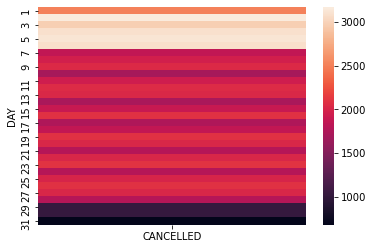

In [57]:
#----------------------6---------------------#

frame = flights_tb[flights_tb['ORIGIN_AIRPORT']=='ATL']
count = frame.groupby('DAY')[['CANCELLED']].count()
sns.heatmap(count)

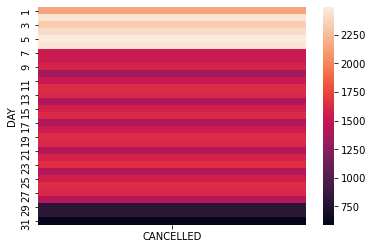

In [58]:
frame = flights_tb[flights_tb['ORIGIN_AIRPORT']=='ORD']
count = frame.groupby('DAY')[['CANCELLED']].count()
sns.heatmap(count)

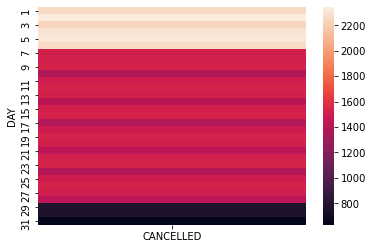

In [59]:
frame = flights_tb[flights_tb['ORIGIN_AIRPORT']=='DFW']
count = frame.groupby('DAY')[['CANCELLED']].count()
sns.heatmap(count)

#--------------------------------------------#

    DEPARTURE_DELAY  ARRIVAL_DELAY
1              -8.0           -9.0
3              -5.0           -9.0
7              14.0          -10.0
12              0.0           -4.0
23             -2.0          -12.0


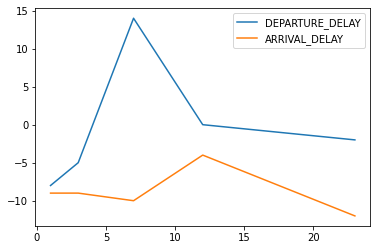

In [63]:
#----------------------7----------------------#

frame = flights_tb[flights_tb['ORIGIN_AIRPORT']=='LAX'].head()
LAX = frame[['DEPARTURE_DELAY' , 'ARRIVAL_DELAY']].head(20)
print(LAX)
LAX.plot()

    DEPARTURE_DELAY  ARRIVAL_DELAY
0             -11.0          -22.0
15             -4.0          -14.0
16            -14.0          -24.0
18             -4.0          -18.0
32              NaN            NaN


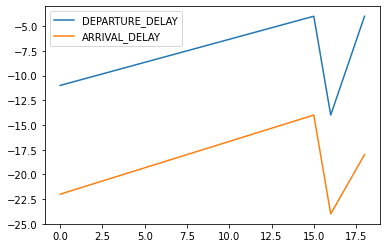

In [61]:
frame = flights_tb[flights_tb['ORIGIN_AIRPORT']=='ANC'].head()
ANC = frame[['DEPARTURE_DELAY' , 'ARRIVAL_DELAY']].head(20)
print(ANC)
ANC.plot()

    DEPARTURE_DELAY  ARRIVAL_DELAY
2              -2.0            5.0
5              -5.0            8.0
8             -11.0          -13.0
17             -6.0           -7.0
92             19.0           26.0


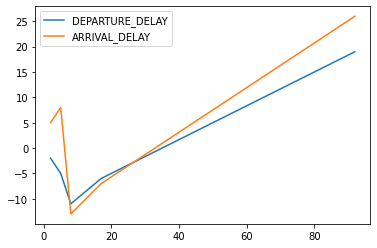

In [62]:
frame = flights_tb[flights_tb['ORIGIN_AIRPORT']=='SFO'].head()
SFO = frame[['DEPARTURE_DELAY' , 'ARRIVAL_DELAY']].head(20)
print(SFO)
SFO.plot()

#--------------------------------------------#

B    1142
A     210
C      43
Name: CANCELLATION_REASON, dtype: int64


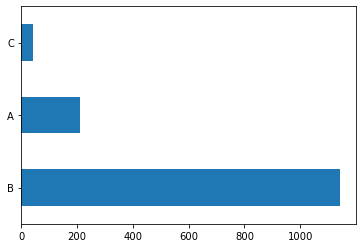

In [66]:
#----------------------8----------------------#

frame = flights_tb[flights_tb['ORIGIN_AIRPORT']=='ATL']
rea = frame['CANCELLATION_REASON'].value_counts()
print(rea)
rea.plot.barh()

B    2013
C     792
A     425
Name: CANCELLATION_REASON, dtype: int64


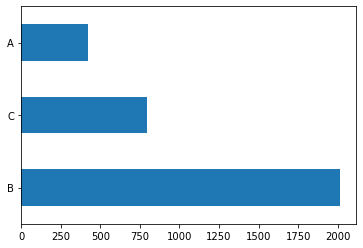

In [72]:
frame = flights_tb[flights_tb['ORIGIN_AIRPORT']=='ORD']
rea = frame['CANCELLATION_REASON'].value_counts()
print(rea)
rea.plot.barh()

B    2929
A     567
C      33
Name: CANCELLATION_REASON, dtype: int64


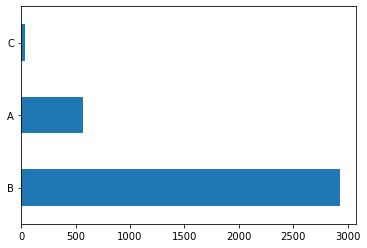

In [71]:
frame = flights_tb[flights_tb['ORIGIN_AIRPORT']=='DFW']
rea = frame['CANCELLATION_REASON'].value_counts()
print(rea)
rea.plot.barh()

#---------------------------------------------#

In [75]:
#----------------------9----------------------#

count = df.groupby('AIRLINE')[['DEPARTURE_DELAY']].max()
port = count.sort_values(by=['DEPARTURE_DELAY'], ascending=False).head(1)
print("Авиакомпания с максимальной задержкой по отправке")
print(port)

Авиакомпания с максимальной задержкой по отправке
         DEPARTURE_DELAY
AIRLINE                 
AA                1988.0


In [77]:
count = df.groupby('AIRLINE')[['ARRIVAL_DELAY']].max()
port = count.sort_values(by=['ARRIVAL_DELAY'], ascending=False).head(1)
print("Авиакомания с максимальной задержкой по прибытию")
print(port)

#---------------------------------------------#

Авиакомания с максимальной задержкой по прибытию
         ARRIVAL_DELAY
AIRLINE               
AA              1971.0
